In [29]:
import numpy as np
import pandas as pd
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import keras 
from tqdm import tqdm
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob 
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from tensorflow.keras.applications import VGG19
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [2]:
#!pip install tensorflow
#!pip install pydot
#!pip install opencv-python

In [3]:
# Replace 'C:\\Users\\INDIA\\Desktop\\SMARTBRIDGE\\Dfungi_image_classification' with the actual path where your archive.zip is located.
zip_file_path = 'C:\\Users\\INDIA\\Desktop\\SMARTBRIDGE\\Dfungi_image_classification\\archive.zip'
extracted_folder_path = 'C:\\Users\\INDIA\\Desktop\\SMARTBRIDGE\\Dfungi_image_classification\\extracted_data'

# Step 1: Extract the contents of the archive.zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Specify the correct path to the image data directory
image_data = extracted_folder_path

In [4]:
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

Files_Name
0         H1
1         H2
2         H3
3         H5
4         H6

In [5]:
files = [i.replace("\\", "/") for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pd.DataFrame(data, columns=["Image", "Label"])

In [6]:
dataframe

Image Label
0     C:/Users/INDIA/Desktop/SMARTBRIDGE/Dfungi_imag...    H5
1     C:/Users/INDIA/Desktop/SMARTBRIDGE/Dfungi_imag...    H1
2     C:/Users/INDIA/Desktop/SMARTBRIDGE/Dfungi_imag...    H1
3     C:/Users/INDIA/Desktop/SMARTBRIDGE/Dfungi_imag...    H3
4     C:/Users/INDIA/Desktop/SMARTBRIDGE/Dfungi_imag...    H1
...                                                 ...   ...
9109  C:/Users/INDIA/Desktop/SMARTBRIDGE/Dfungi_imag...    H6
9110  C:/Users/INDIA/Desktop/SMARTBRIDGE/Dfungi_imag...    H1
9111  C:/Users/INDIA/Desktop/SMARTBRIDGE/Dfungi_imag...    H1
9112  C:/Users/INDIA/Desktop/SMARTBRIDGE/Dfungi_imag...    H2
9113  C:/Users/INDIA/Desktop/SMARTBRIDGE/Dfungi_imag...    H5

[9114 rows x 2 columns]

# Data Exploration

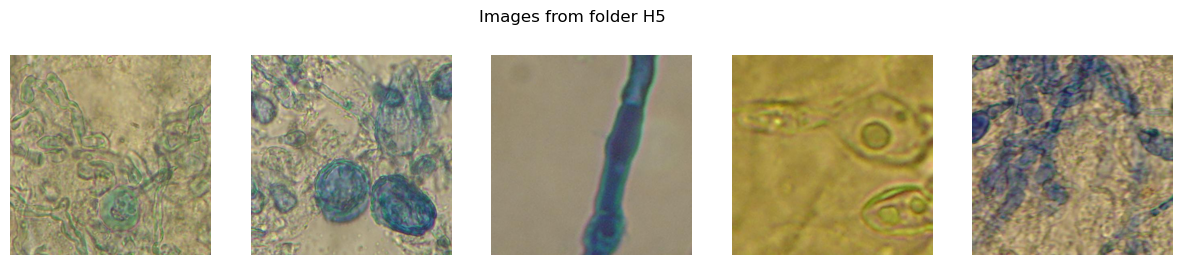

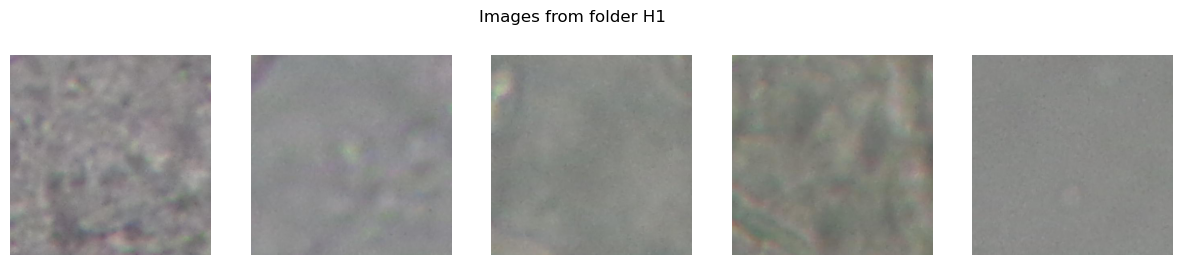

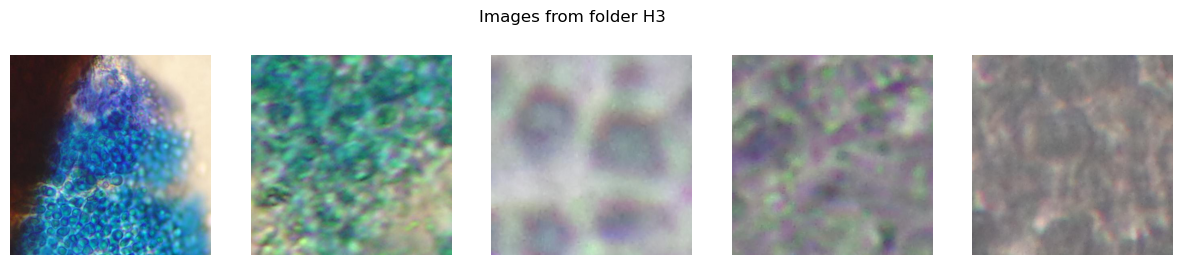

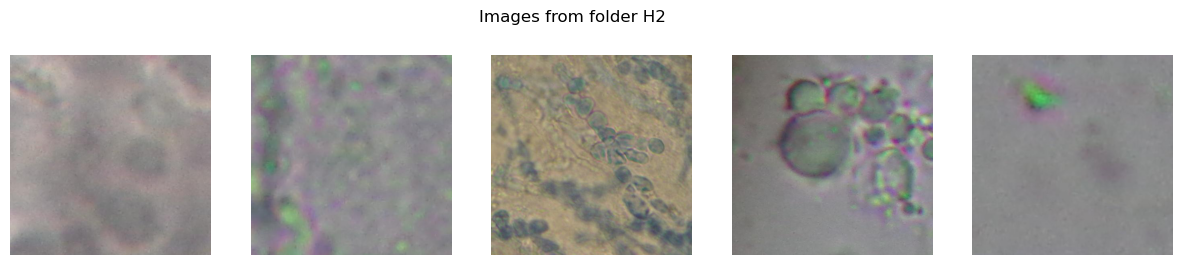

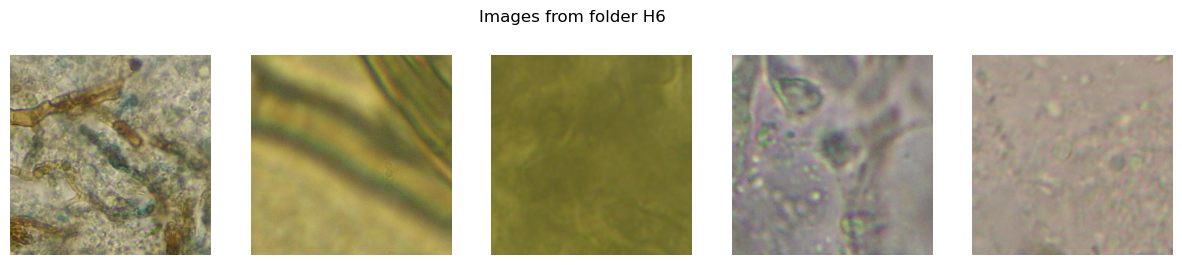

In [7]:
# Visualize 5 images from each folder 
folders = dataframe['Label'].unique()

for folder in folders:
    folder_images = dataframe[dataframe['Label'] == folder]['Image'][:5]
    
    fig, axs = plt.subplots(1, 5, figsize=(15, 3))  # Adjust figsize as needed
    
    for i, image_path in enumerate(folder_images):
        img = mpimg.imread(image_path)
        axs[i].imshow(img)
        axs[i].axis('off')
    
    plt.suptitle(f"Images from folder {folder}")
    plt.show()

# Data Vsualization

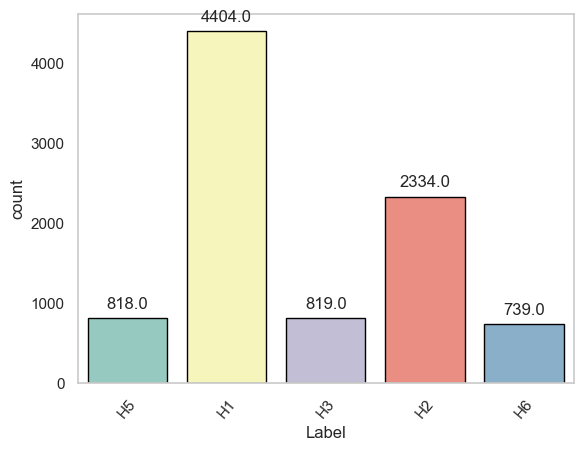

In [8]:
# Create style for plot
sns.set(style="whitegrid")

# Create a countplot with different colors for each category
ax = sns.countplot(x=dataframe["Label"], palette="Set3", edgecolor='black')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=50)
plt.grid(False)  # Turn off grid lines
plt.show()

# Data Augmentation

In [9]:
# # Create a directory to save augmented images
# augmented_dir = "C:/Users/INDIA/Desktop/SMARTBRIDGE/Dfungi_image_classification/AugmentedImages"
# os.makedirs(augmented_dir, exist_ok=True)

# # Data augmentation settings
# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Apply data augmentation to each image and save the augmented images
# for index, row in dataframe.iterrows():
#     img = load_img(row['Image'])
#     x = img_to_array(img)
#     x = x.reshape((1,) + x.shape)
    
#     # Generate augmented images
#     i = 0
#     for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_dir, save_prefix=row['Label'], save_format='jpeg'):
#         i += 1
#         if i >= 2:  # Generate 5 augmented images for each original image
#             break


In [10]:
# # Assuming augmented_dir is the directory where augmented images are saved
# augmented_dir = "C:/Users/INDIA/Desktop/SMARTBRIDGE/Dfungi_image_classification/AugmentedImages"

# # Create an empty DataFrame to store information about augmented images
# augmented_dataframe = pd.DataFrame(columns=['Image', 'Label'])

# # Iterate through the augmented images directory
# for filename in os.listdir(augmented_dir):
#     # Assuming the file names are in the format "label_image_index.jpeg"
#     label = filename.split('_')[0]
    
#     # Create the file path
#     filepath = os.path.join(augmented_dir, filename)
    
#     # Append the information to the DataFrame
#     augmented_dataframe = augmented_dataframe.append({'Image': filepath, 'Label': label}, ignore_index=True)

# # Display the first few rows of the augmented DataFrame
# print(augmented_dataframe)

In [11]:
#augmented_dataframe.shape

# Data Vsualization After Data Augmentation

In [12]:
# # Create style for plot
# sns.set(style="whitegrid")

# # Create a countplot with different colors for each category
# ax = sns.countplot(x=augmented_dataframe["Label"], palette="Set3", edgecolor='black')

# # Annotate each bar with its count
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# plt.xticks(rotation=50)
# plt.grid(False)  # Turn off grid lines
# plt.show()

# Split Train and Test Dataset

In [13]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 9114 files belonging to 5 classes.
Using 7292 files for training.
Found 9114 files belonging to 5 classes.
Using 1822 files for validation.


In [14]:
class_names = train.class_names
class_names

['H1', 'H2', 'H3', 'H5', 'H6']

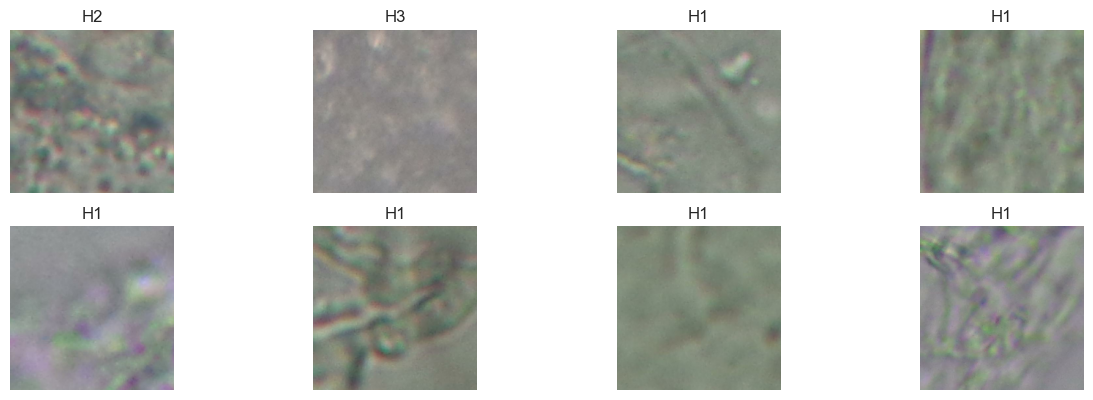

In [15]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Model Building

In [16]:
# Create VGG19 base model
base_model = tf.keras.applications.VGG19(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Create a sequential model
keras_model = keras.models.Sequential()

# Add the VGG19 base model to the sequential model
keras_model.add(base_model)

# Flatten the output of the base model
keras_model.add(keras.layers.Flatten())

# Add dropout layer
keras_model.add(keras.layers.Dropout(0.5))

# Add dense layer with softmax activation for classification
keras_model.add(keras.layers.Dense(5, activation=tf.nn.softmax))

# Display model summary
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 5)                 125445    
                                                                 
Total params: 20149829 (76.87 MB)
Trainable params: 125445 (490.02 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [17]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [18]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [19]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=20,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/20
228/228 [==============================] - 5904s 26s/step - loss: 4.2653 - accuracy: 0.5756 - val_loss: 2.1046 - val_accuracy: 0.7289
Epoch 2/20
228/228 [==============================] - 5276s 23s/step - loss: 2.9095 - accuracy: 0.6968 - val_loss: 1.2575 - val_accuracy: 0.8085
Epoch 3/20
228/228 [==============================] - 5091s 22s/step - loss: 2.2884 - accuracy: 0.7441 - val_loss: 1.1517 - val_accuracy: 0.8535
Epoch 4/20
228/228 [==============================] - 5558s 24s/step - loss: 2.1572 - accuracy: 0.7687 - val_loss: 1.0148 - val_accuracy: 0.8584
Epoch 5/20
228/228 [==============================] - 5886s 26s/step - loss: 1.9396 - accuracy: 0.7929 - val_loss: 1.1552 - val_accuracy: 0.8765
Epoch 6/20
228/228 [==============================] - 6097s 27s/step - loss: 1.8936 - accuracy: 0.8020 - val_loss: 1.1548 - val_accuracy: 0.8710
Epoch 7/20
228/228 [==============================] - 6050s 27s/step - loss: 1.8738 - accuracy: 0.8097 - val_loss: 1.3675 - val_ac

In [20]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

57/57 [==============================] - 1223s 21s/step - loss: 1.0148 - accuracy: 0.8584
Test Loss = 1.0147747993469238
Test Accuracy = 0.858397364616394


In [21]:
hist_=pd.DataFrame(hist.history)
hist_

loss  accuracy  val_loss  val_accuracy
0  4.265290  0.575562  2.104603      0.728869
1  2.909455  0.696791  1.257510      0.808452
2  2.288365  0.744103  1.151676      0.853458
3  2.157200  0.768651  1.014775      0.858397
4  1.939563  0.792924  1.155221      0.876509
5  1.893602  0.801975  1.154838      0.871021
6  1.873826  0.809654  1.367527      0.868277
7  1.854922  0.822957  1.561268      0.819978
8  1.897548  0.819940  1.078526      0.900110

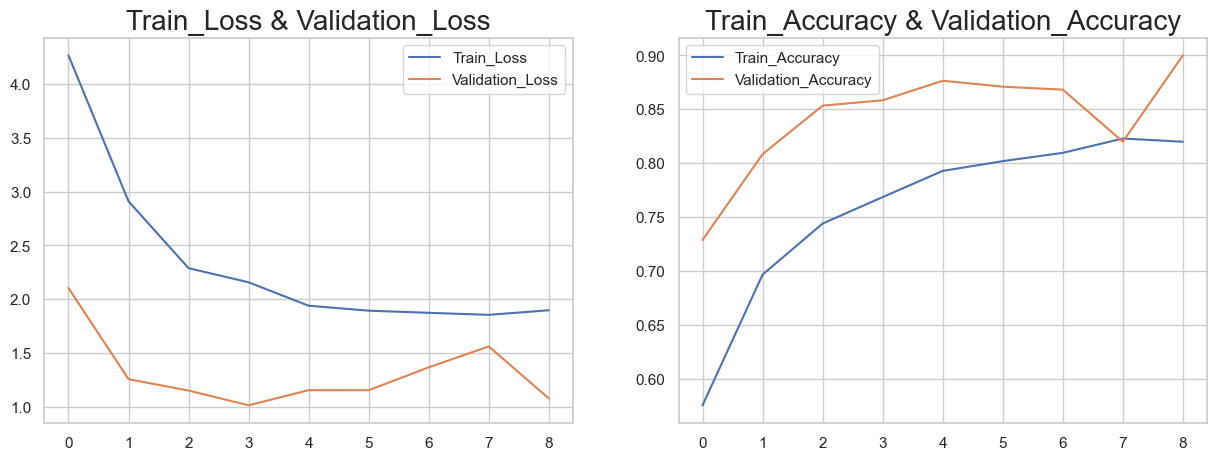

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [23]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

57/57 [==============================] - 1262s 21s/step


Actual  Prediction
0          0           0
1          0           0
2          0           0
3          0           0
4          0           0
...      ...         ...
1817       1           1
1818       3           3
1819       0           0
1820       0           0
1821       1           1

[1822 rows x 2 columns]

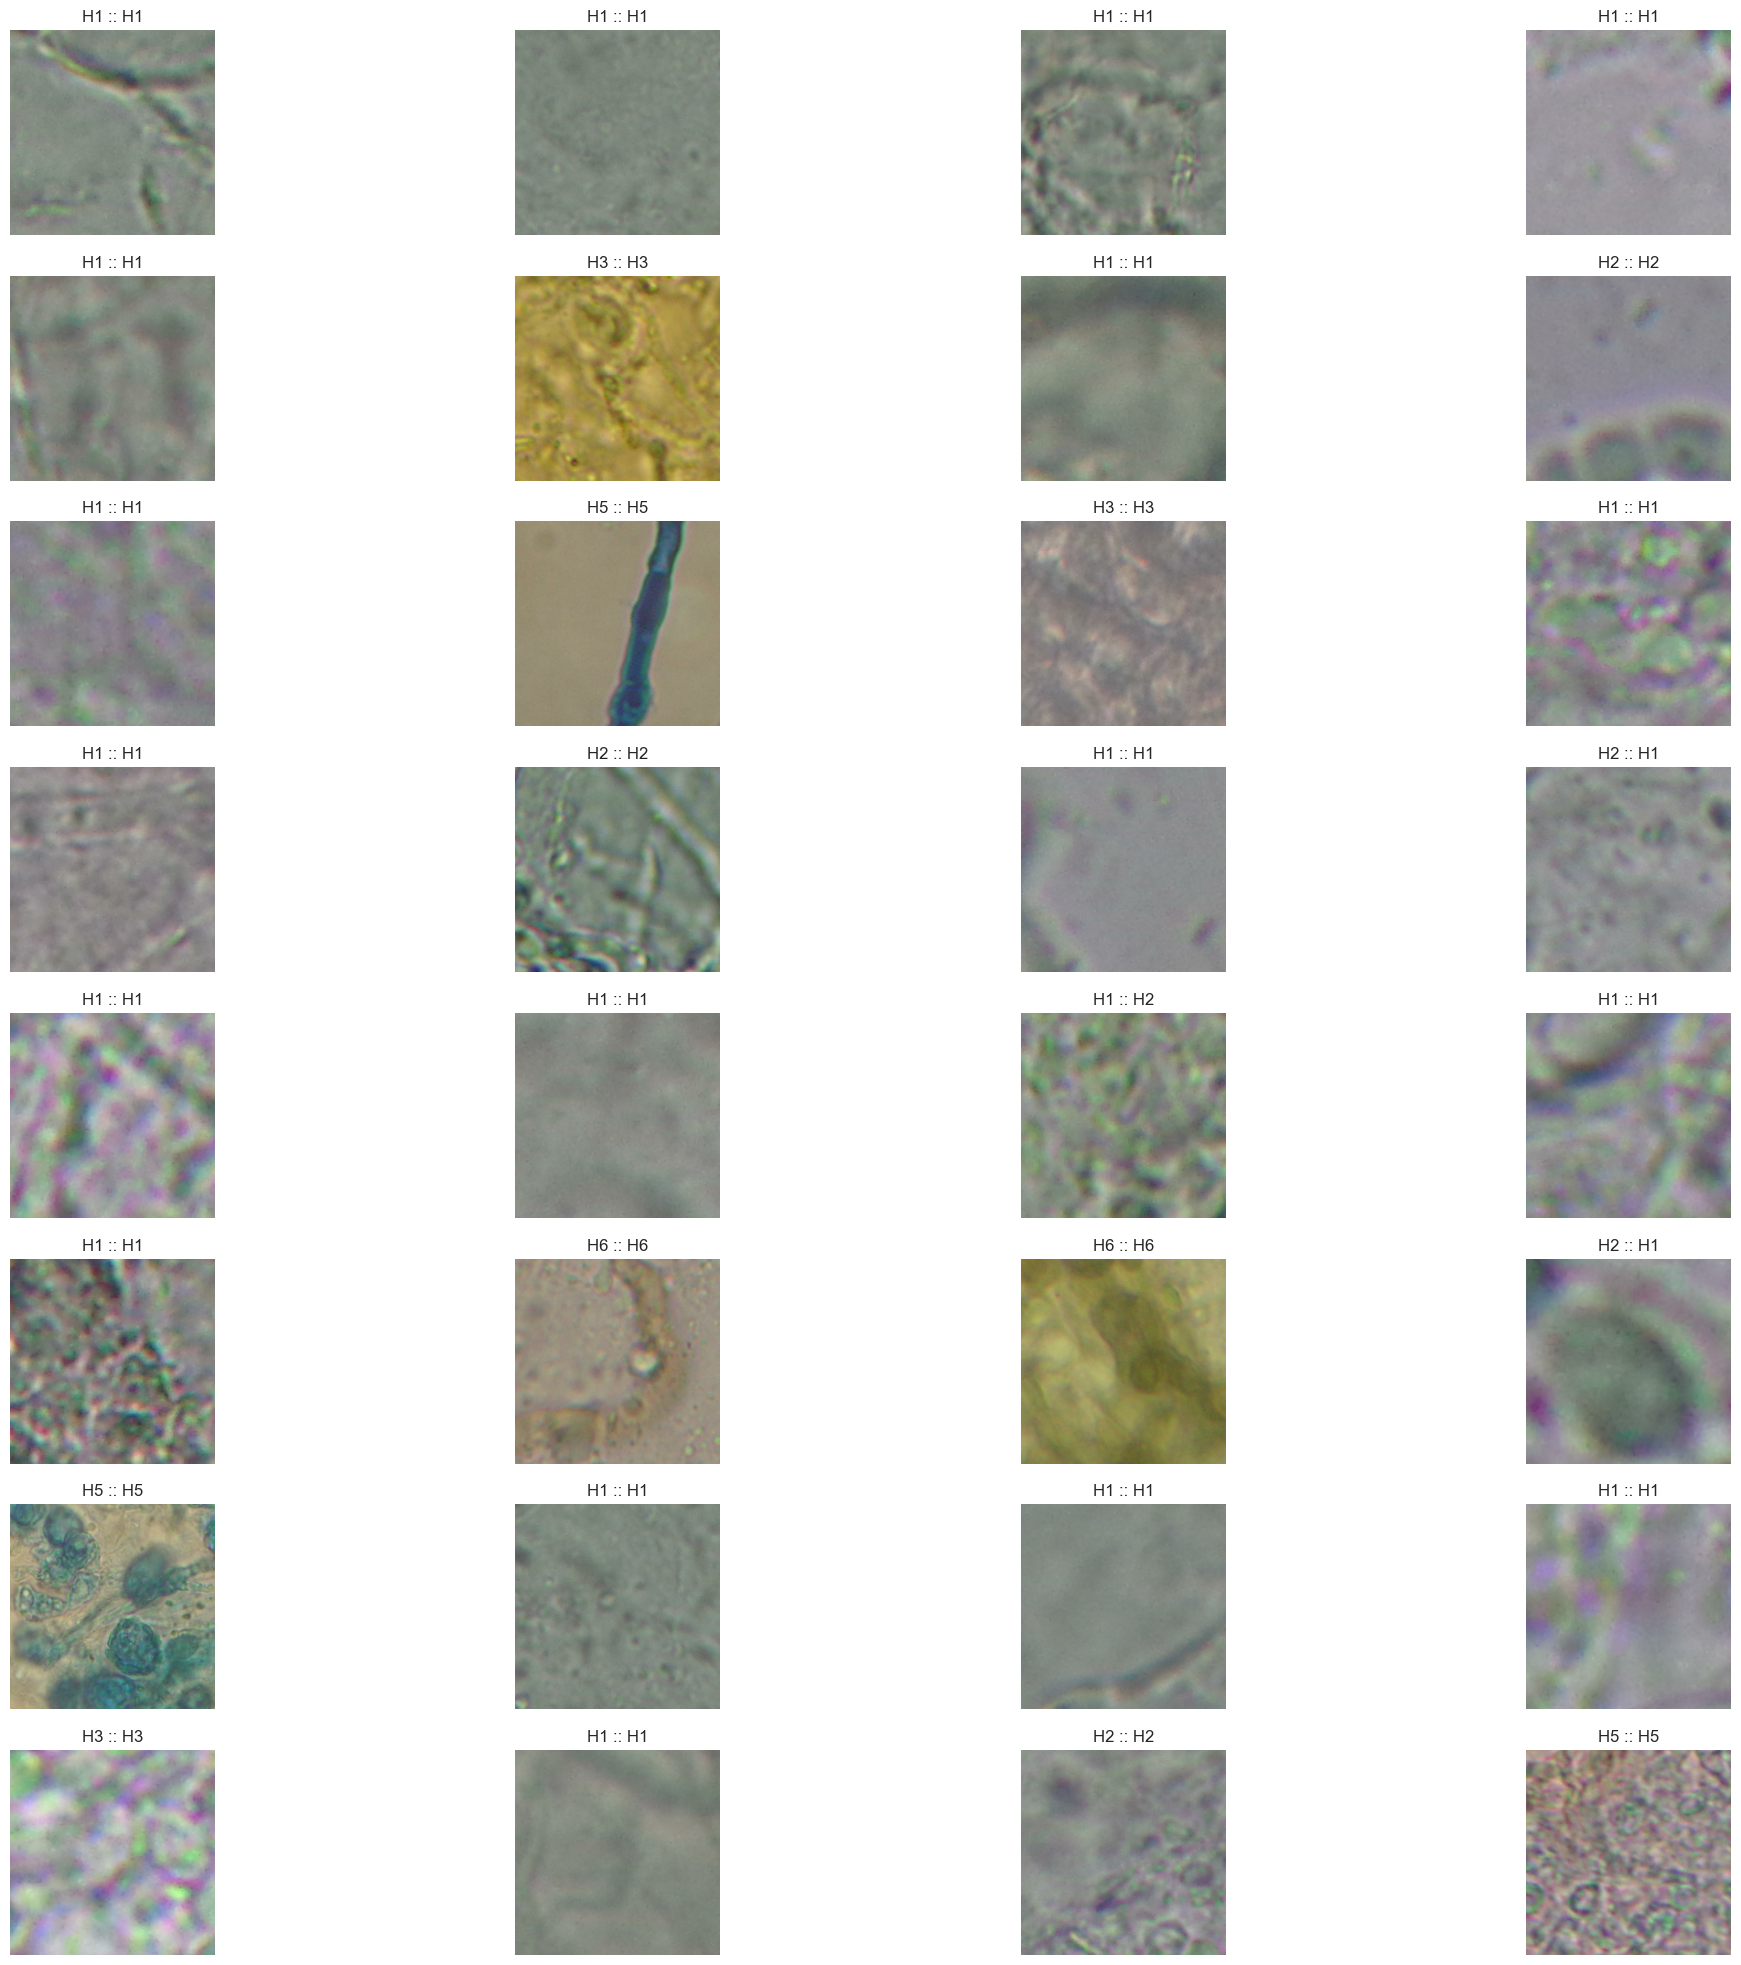

In [24]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

# confusion Matrix

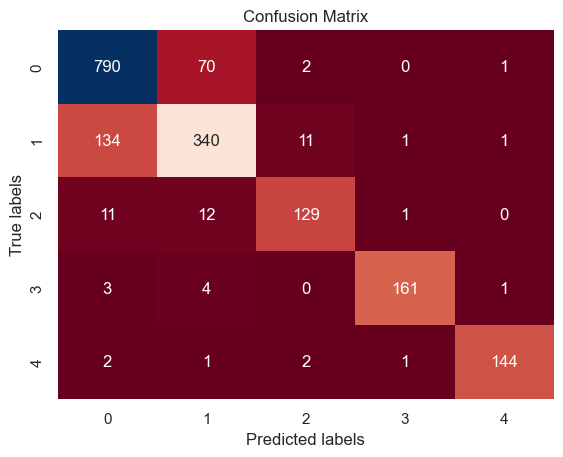

array([[790,  70,   2,   0,   1],
       [134, 340,  11,   1,   1],
       [ 11,  12, 129,   1,   0],
       [  3,   4,   0, 161,   1],
       [  2,   1,   2,   1, 144]], dtype=int64)

In [25]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()
CM

In [26]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.3f}%".format(Acc * 100))

accuracy is: 85.840%


In [27]:
# Save the model with a specific name
keras_model.save('vgg_19_Defungi.h5')

In [30]:
# Load the model
loaded_model = load_model('vgg_19_Defungi.h5')